# `Bloque Cero`

## Tema: Ideas básicas sobre Python y algunos paquetes fundamentales (part5)

Tópicos sobre [Matplotlib](https://matplotlib.org):
- Pylab
- 2D plot
- 3D plot
- Animaciones
- Backends

Comentario: este notebook es una adaptación del presentado en: http://jrjohansson.github.io/computing.html

La librería `Matplotlib` nos permite controlar cada elemento de un gráfico, desde las características del marco hasta el tipo de fuente utilizado. Esto le hace una herramienta necesaria de conocer para una mejor presentación de los diferentes resultados numéricos. En este notebook mostraremos el ABC del uso del paquete, sin embargo recomendamos encarecidamente visitar [Matplotlib](https://matplotlib.org)

## Pylab

Una forma rápida de graficar es mediante la API (interfaz de programación de aplicaciones) `Pylab` la cual integra en un mismo conjunto utilidades gráficas del módulo `pyplot` y las numéricas de `NumPy`, lo cual hace que las intrucciones para graficar sean muy similares que para el programa [MATLAB](https://la.mathworks.com/products/matlab.html). Sin embargo esta API no explota todo el potencial de la librería, y de hecho, como aparece reflejado en el sitio web del paquete [no se recomienda su uso](https://matplotlib.org/stable/api/pylab.html), sin embargo veamos algunos ejemplos básicos.

In [1]:
# necesario para nuestros ejemplos
from pylab import *

Veamos un ejemplo simple, notar que los códigos para graficar son equivalentes a Matlab

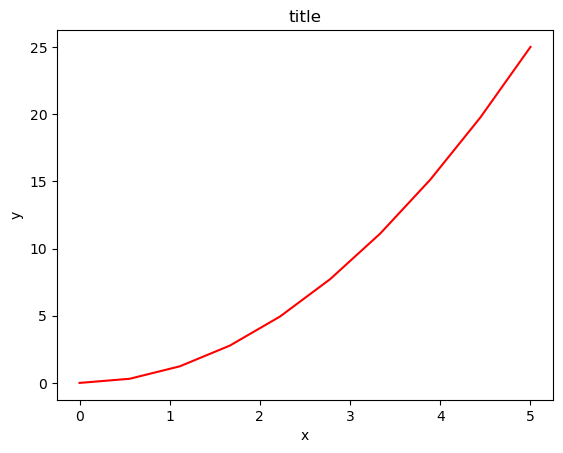

In [2]:
# generando datos
x = np.linspace(0, 5, 10)  # notar como no tuve q cargar numpy
y = x**2

# graficando
figure()  # crea el marco
plot(x, y, 'r')  # grafica
xlabel('x')  # x-label
ylabel('y')  # y-label
title('title')  # title
show()  # show -> esto no es necesario en jupyter

Muchas de las funciones para graficar definidas en Matlab aparecen en el módulo `pylab`, entre ellas y una de las más importante serían definir subplots, los colores, símbolos, etc. de los trazados. Veamos un ejemplo:

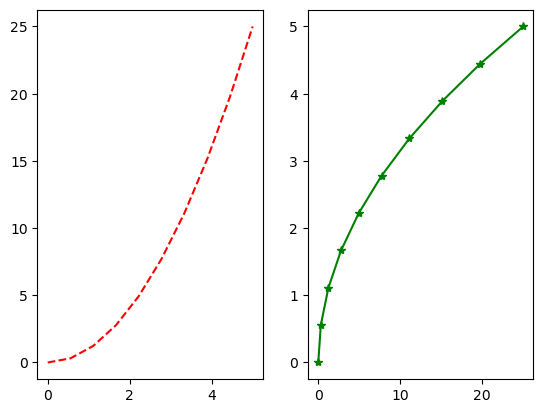

In [3]:
subplot(1, 2, 1)  # el primer número indica el número de filas, el segundo de columnas, y el tercerlo la posición q se graficará
plot(x, y, 'r--')  # de forma abreviada ls='--', color='r'

subplot(1,2,2)
plot(y, x, 'g*-')

## 2D Plots

El uso de la API es recomendable para gráficos sencillos y si se es conocedor del como graficar en Matlab. Sin embargo, es mucho más recomendable (y nos centraremos en ello en lo adelante) el usar la API orientada a objeto. Esta nos permite construir figuras muy avanzadas y modificar cualquier aspecto del gráfico. Lo anterior es debido a que al ser orientada a objeto nos permitirá crear uno (el frame) y aplicar sobre este diferentes funciones.

La idea a seguir es muy similar al anterior, solo que esta vez almacenaremos el objeto en una variable y a partir de esta creamos diferentes instancias que aparecen en la clase `Figure`: ejemplos `axes`, `lengend`, etc. las cuales se van agregando usando el método. Por ejemplos los ejes se añadiría mediante `add_axes`, mietras que otros serían usando `set_`. 

Veamos como se implementarían los ejemplos anteriores:

In [ ]:
# reiniciar kernel

In [1]:
import matplotlib.pyplot as plt  # el subpaquete pyplot es el que contiene los módulos para graficar
import numpy as np  # notar como ahora si debemos importar numpy

Text(0.5, 1.0, 'title')

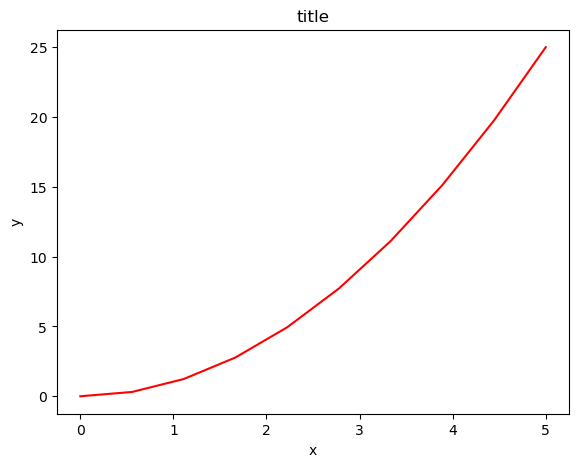

In [3]:
# creando datos
x = np.linspace(0, 5, 10)
y = x**2

fig = plt.figure()  # creando un frame (lienzo) cuya medida es 1x1 y que se "almacenará" en la variable fig

# creemos los ejes
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # left, bottom, width, height con respecto a las medidas de frame 
axes.plot(x, y, 'r')

# modificando algunos detalles
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

La función `plot` puede recibir [múltiples argumentos](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) entre los que destacan: `linestyle (ls), linewidth (lw), marker (m), markersize, label, color, alpha`, etc.

Notar como ahora hay más líneas de código, sin embargo, vale la pena por tener acceso a cada parte de la figura, incluyendo poner figuras internas.

Text(0.5, 1.0, 'insert title')

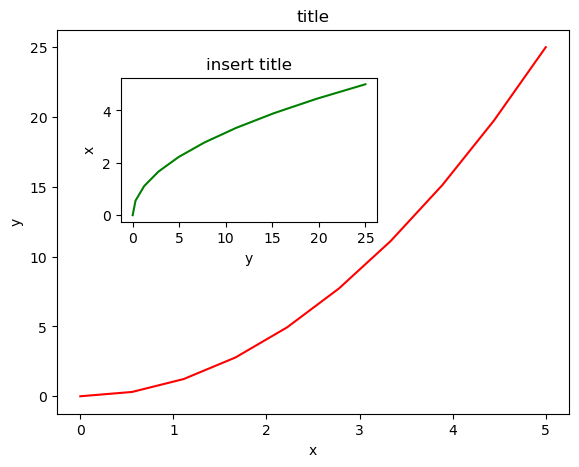

In [4]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])  # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title')

El segundo ejemplo se pudiera reproducir poniendo la imagen princial y el insert en la posicion adecuada:

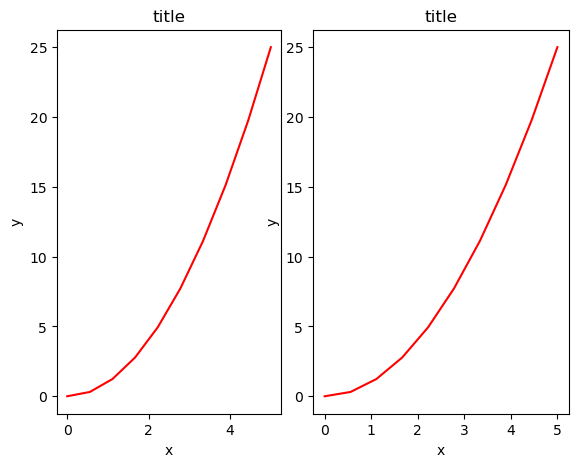

In [13]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.35, 0.8])  # main axes
axes2 = fig.add_axes([0.5, 0.1, 0.4, 0.8])  # inset axes # mover numeros 

axes = [axes1, axes2]

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

Sin embargo, podemos utilizar uno de los muchos administradores de diseño ya definidos en la librería, por ejemplo (y uno de los más usados): `subplots`

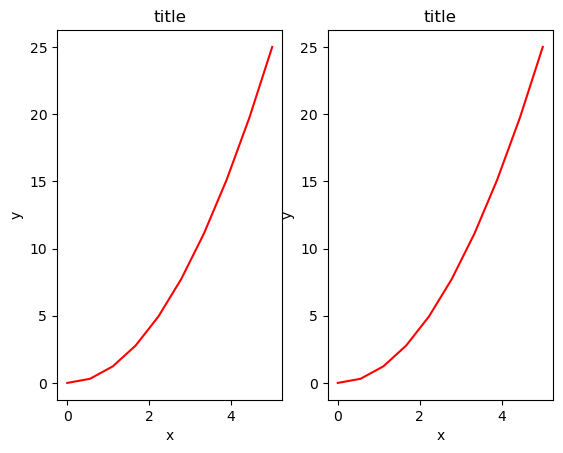

In [15]:
# Notar como subplots devuelve dos elementos, fig, que es el frame, y una lista (en este caso axes) que contiene los eje
# determinados por nrows=1, ncols=2.
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

Notar que fue bastante rápido, sin embargo no está muy bonito. Ver como hay ejes superpuestos. Pues bueno, eso se puede modificar mediante el comando
`gridspec_kw=dict(hspace=0, wspace=.1)` dentro de las opciones de subplots. Ejemplo:

Otra opción es utilizar directamente el método `fig.tight_layout`, que ajusta automáticamente las posiciones de los ejes en el frame de la figura para que no haya contenido superpuesto:

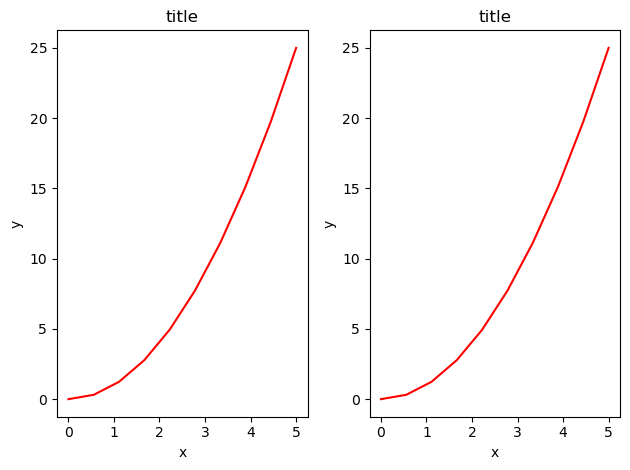

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

Ahora, no crean que eso es lo único que podemos hacer, al contrario. Por ejemplo, podemos definir el tamaño del frame (lienzo) cuando creamos el objeto `Figura`. Para ello utilizamos los argumentos de palabras clave `figsize` y `dpi`. El primero, `figsize` es una tupla del ancho y alto de la figura en pulgadas, y `dpi` son los puntos por pulgada (píxeles por pulgada). Para crear una figura de `800x400` píxeles y `100` puntos por pulgada, podemos hacer:

Text(0.5, 1.0, 'title')

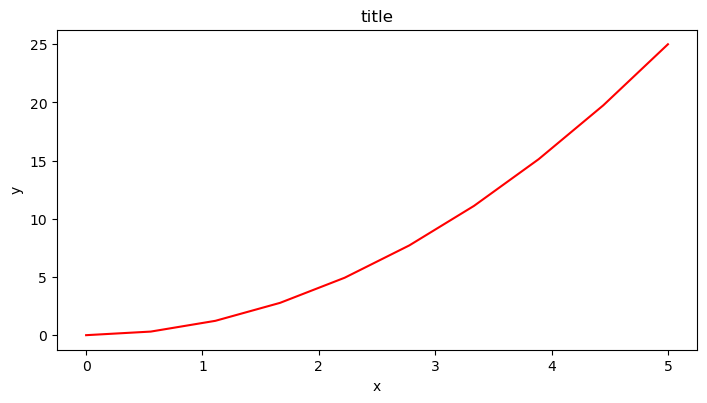

In [20]:
fig = plt.figure(figsize=(8,4), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

Estos mismos argumentos pueden pasarse a la función `subplots`: 

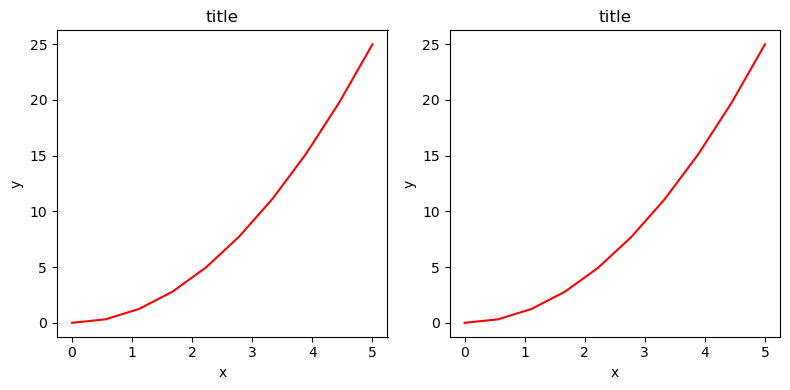

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4), dpi=100)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

Para salvar las figuras creadas podemos usar el método `savefig` definido en la clase `Figure`:

In [ ]:
#fig.savefig("filename.png")

#fig.savefig("filename.png", dpi=200)

#fig.savefig('filename.pdf', format='pdf', metadata=None, # dpi='figure',
 #       pad_inches=0.1,
 #       facecolor='auto', edgecolor='auto',
 #       backend=None, dpi=1000, 
 #       bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
 #      )

`Matplotlib` puede salvar los resultados en formatos de alta calidad como: `PNG`, `JPG`, `EPS`, `SVG`, `PGF` y `PDF`. Para artículos científicos, es recomendable usar este último puesto que los documentos compilados con [LaTeX](https://es.wikipedia.org/wiki/LaTeX) pueden incluir archivos `PDF` usando el comando `includegraphics`.

A continuación veamos como modificar e introducir algunos elementos básicos del gráfico:

- Título de la figura: un título se puede añadir a cada eje creado en una figura mediante el método `set_title` aplicado a cada eje. Este método puede recibir [varios argumentos](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html), como lo son el título, la locación, color del texto, separación del eje, etc.

- Label de los ejes: de manera similar, podemos añadirlo con el método `set_`, en este caso `set_xlabel` y `set_ylabel`. Nuevamente este método puede recibir [varios argumentos](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) como por ejemplo, tamaño, localización, etc.

- Legendas: se puede crear una leyenda de la figura correspondiente a cada llamada de `plt.plot` realizada. Esta función puede recibir [varios argumentos](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html). Para la creación de estas leyendas existen dos formas: la primera es dando como argumento a la función `legend` una lista o tupla (en orden) de los labels de las curvas graficadas.

Una segunda vía es asignandole un keyword como argumento de cada plot realizado `label="label text"`. De esta forma al llamar a la función `legend` (sin argumentos) añadirá automáticamente los labels.

Como fue señalado la función `legend()` puede recibir [varios argumentos](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html), entre ellos indicar el órden en que aparecen en la leyenda (automáticamente toma el orden de aparación de los `plot`) mediante `handles`

También puede indicarse la locación de la leyenda mediante el argumento `loc`

Text(0.5, 1.0, 'title')

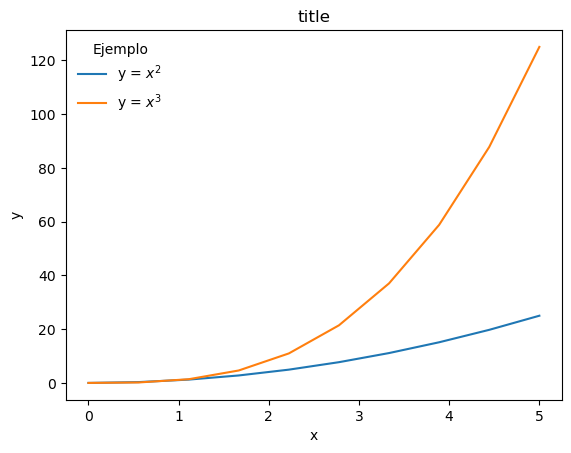

In [22]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r'y = $x^{2}$')
ax.plot(x, x**3, label=r'y = $x^{3}$')

ax.legend(loc='upper left',  frameon=False, title=r'Ejemplo')

ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_title(r'title')

Noten como delante de cada string, puse una `r` y se encerró a las ecuaciones entre signos de `$ $`. El primer comando le indica al paquete que el texto debe interpretarse como "raw" text strings y debe compilarse en entorno `Latex`. Por otro lado aunque los gráficos están bien, la cálidad en los número, textos no es la adecuada. Para lograrlo lo que se debe hacer es usar el formato `Latex` y ajustar a través de este la apariencia de la figura. Veamos:

Text(0.5, 1.0, 'title')

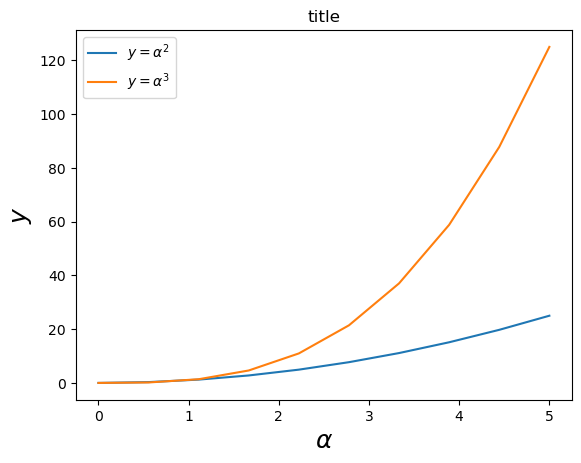

In [24]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title')

En este caso se modificaron los parámetros localmente (solo para este plot), en caso de quererse hacer globalmente se ha de usar:

Como se aprecia, aún se ve bastante mal. Una buena opción es:

In [33]:
# Update the matplotlib configuration parameters:
import matplotlib 

matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Text(0.5, 1.0, 'title')

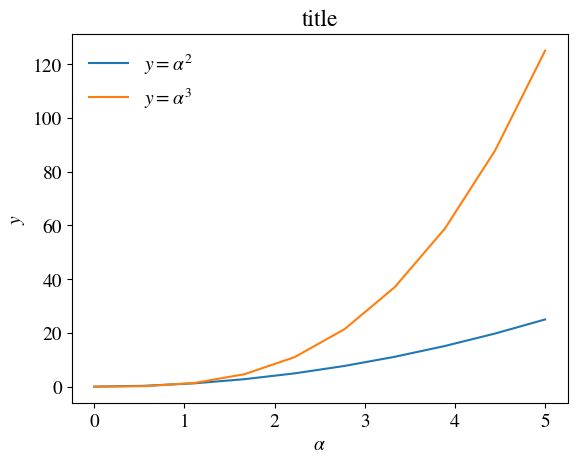

In [34]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2, frameon=False) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title')

Otra alternativa (mi preferida), es indicarle a `matplotlib` que use `LaTeX` para representar los elementos de la figura. En este caso necesitaremos tener instalado Latex.

In [37]:
matplotlib.rcParams.update({'font.size': 14, 'text.usetex': True})
# restore
# matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

Text(0.5, 1.0, 'title')

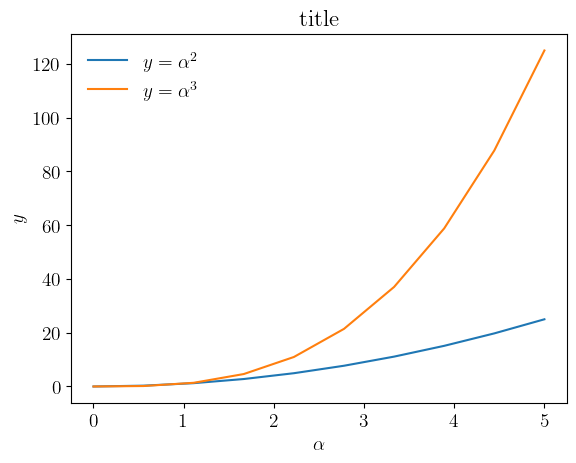

In [38]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2, frameon=False) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title')

- Definiendo los colores, estilo y grosor de las lineas.

Referente a los colores, estos pueden ser definidos de varias maneras. En primer lugar, podemos usar la sintaxis similar a MATLAB donde `'b'` significa azul, `'g'` significa verde, etc.

In [39]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

# notar que no salio, pq no hemos creado el frame, podemos usar plt.plot

También podemos definir colores por sus nombres o códigos hexadecimales RGB y, opcionalmente, proporcionar un valor `alfa`

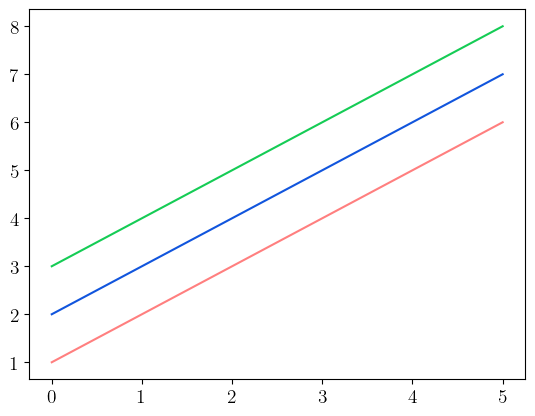

In [40]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

- Estilo de línea y marcadores: Para cambiar el ancho de la línea, podemos usar el argumento de palabra clave `linewidth` o `lw`. El estilo de línea se puede seleccionar usando los argumentos de palabras clave `linestyle` o `ls`:

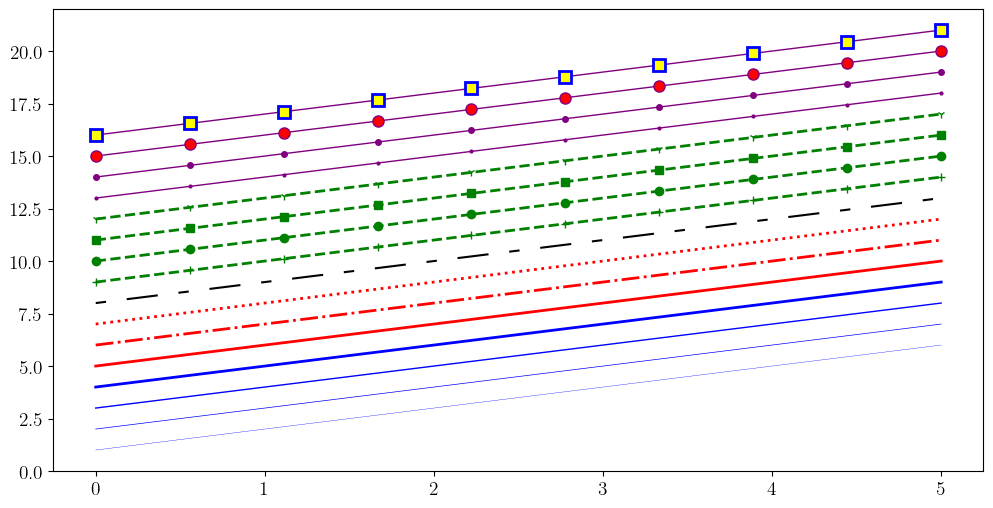

In [41]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

Similar a MATLAB podemos seleccionar los estilos de forma abreviada, por ejemplo, `'b. -'` significa una línea azul con puntos:

Uno de los aspectos importantes en un plot es el estilo de los ejes, por ejemplo dónde se colocan los ticks y las etiquetas, modificar el tamaño de fuente y posiblemente las etiquetas utilizadas en los ejes. A continuación presentamos las ideas básicas para controlar esas propiedades en una figura.

- Límite de los ejes: para manipular estos límites hacemos uso de las funciones `set_ylim` y `set_xlim` en el objeto de eje, o `axis('tight')` para obtener automáticamente rangos de ejes "perfectamente ajustados":

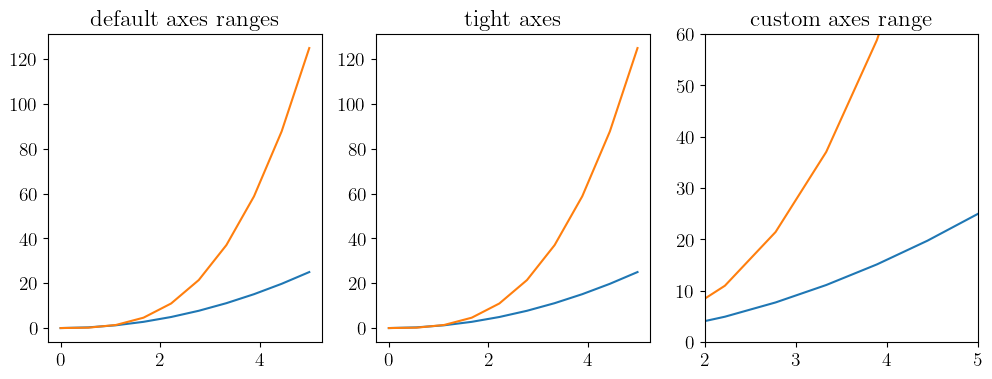

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

- Escala de los ejes: es posible establecer una escala logarítmica para uno o ambos ejes. De hecho, se pueden establece muchas más como por ejemplo:
`['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'mercator', 'symlog']`, o incluso se puede personalizar la escala o la base del logaritmo. Para más información consultar: https://matplotlib.org/stable/users/explain/axes/axes_scales.html 


Para establecer la escala en cada uno de los ejes por separado se usa la función `set_xscale` y `set_yscale` que aceptan un parámetro, que para el caso de logaritmo base $10$ es `log`.

Text(0.5, 1.0, 'Logarithmic scale (y)')

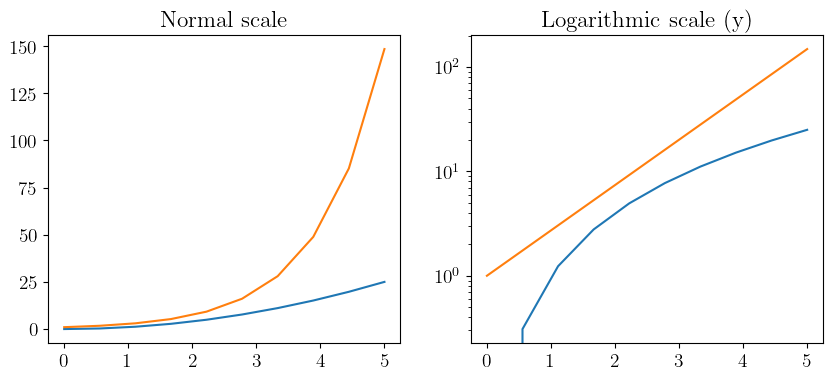

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x)) # notar como puedo poner dos plot seguidos
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))  # notar como puedo poner dos plot seguidos
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)")

- axes-ticks: una de las cosas cool de la librería es que podemos determinar explícitamente dónde queremos los ticks del eje mediante `set_xticks` y `set_yticks`. Estas funciones toman una lista de valores para indicar en qué parte del eje se deben colocar los ticks. También podemos usar los métodos `set_xticklabels` y `set_yticklabels` para proporcionar una lista de etiquetas de texto personalizadas para cada ubicación de marca:

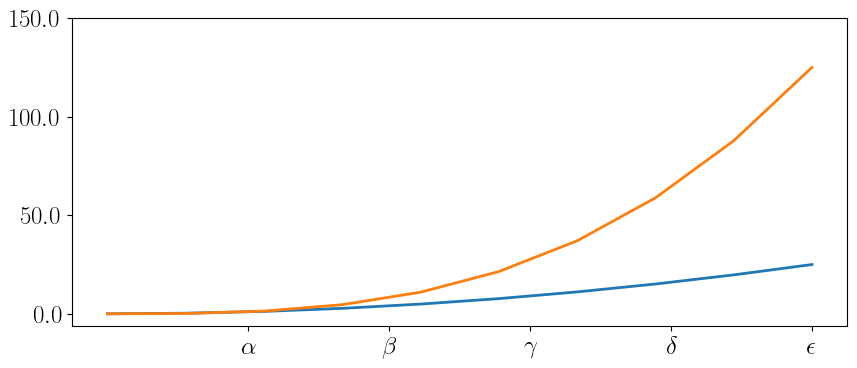

In [44]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

- Notación científica: en muchos casos donde los números son grandes es recomendable usar la notación científica, para hacerlo solo debemos cambiar el formato de los ejes:

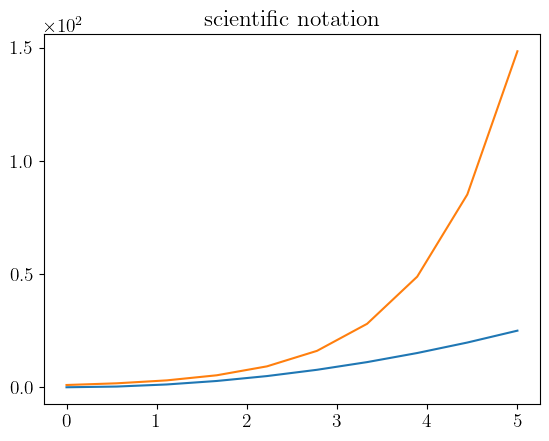

In [45]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

- Distancia entre label, número y el eje. En ocasiones queremos alejar o acercar los número al eje, para ello solo debemos modificar la opción `rcParms`. En el caso de que querramos alejar el label del eje, solo debemos usar `labelpad`. Veamos

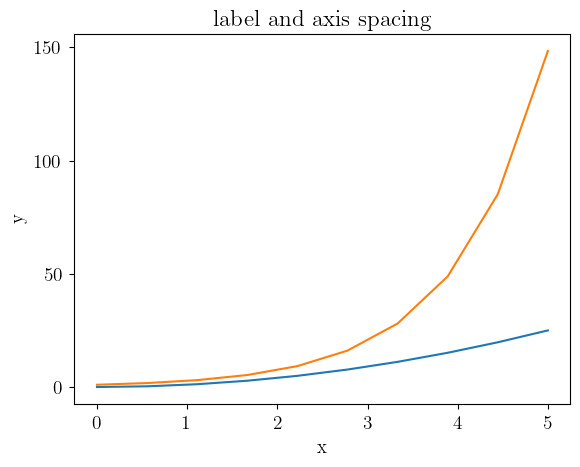

In [49]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y")

In [50]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

- [Grid](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html): Para visualizar la ''malla'' en un plot, usamos la función `grid` en el objeto de eje que queremos modificar. Con esta función podemos activar y desactivar las líneas de la cuadrícula. También podemos personalizar la apariencia de las líneas de la cuadrícula usando los mismos argumentos de palabras clave que la función `plot`

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

- Axis spines. Matplotlib nos permite también modificar los spines de los ejes.

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

- Multiples ejes: A veces es útil tener dos ejes x o y en una figura; por ejemplo, al trazar curvas con diferentes unidades juntas. Matplotlib admite esto con las funciones `twinx` y `twiny`:

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

- Axes origen: Posicionando el origen de los ejes.

In [ ]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3)

Además del método habitual `plot`, existen otras funciones para generar diferentes tipos de gráficos. Es recomendable consultar los [ejemplos](https://matplotlib.org/stable/gallery/index.html). A continuación mostramos algunos de los más utilizados:

-  Escaterín, función escalon, barras, y relleno: `scatter, step, bar, fill_between`

Text(0.5, 1.0, 'fill_between')

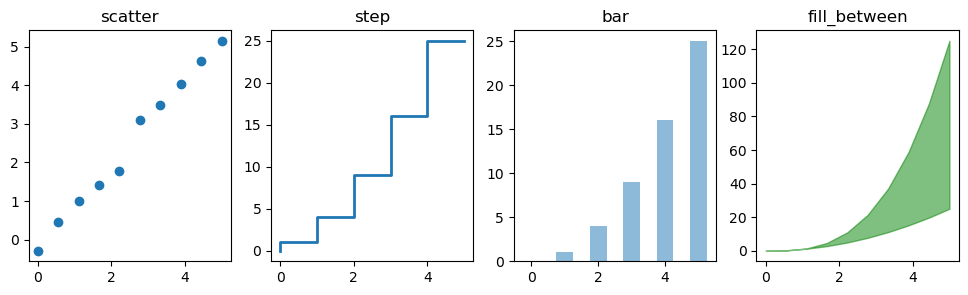

In [4]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(0, 5, 10)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(xx, xx**2, xx**3, color="green", alpha=0.5)
axes[3].set_title("fill_between")


- Líneas y regiones horizontale y verticales: `axhline, axvline, axhspan, axvspan` 

Ejemplo tomado de: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axhspan_demo.html

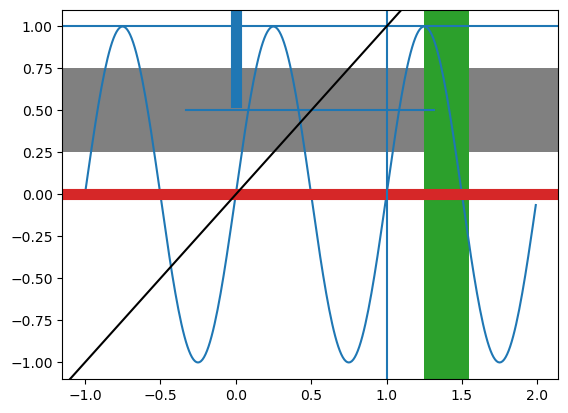

In [6]:
t = np.arange(-1, 2, .01)
s = np.sin(2 * np.pi * t)

fig, ax = plt.subplots()

ax.plot(t, s)
# Thick red horizontal line at y=0 that spans the xrange.
ax.axhline(linewidth=8, color='#d62728')
# Horizontal line at y=1 that spans the xrange.
ax.axhline(y=1)
# Vertical line at x=1 that spans the yrange.
ax.axvline(x=1)
# Thick blue vertical line at x=0 that spans the upper quadrant of the yrange.
ax.axvline(x=0, ymin=0.75, linewidth=8, color='#1f77b4')
# Default hline at y=.5 that spans the middle half of the axes.
ax.axhline(y=.5, xmin=0.25, xmax=0.75)
# Infinite black line going through (0, 0) to (1, 1).
ax.axline((0, 0), (1, 1), color='k')
# 50%-gray rectangle spanning the axes' width from y=0.25 to y=0.75.
ax.axhspan(0.25, 0.75, facecolor='0.5')
# Green rectangle spanning the axes' height from x=1.25 to x=1.55.
ax.axvspan(1.25, 1.55, facecolor='#2ca02c')

- Coordenadas polares:

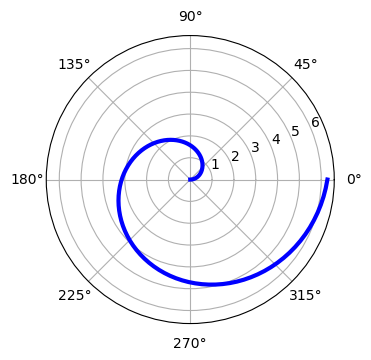

In [5]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3)

- Histogramas

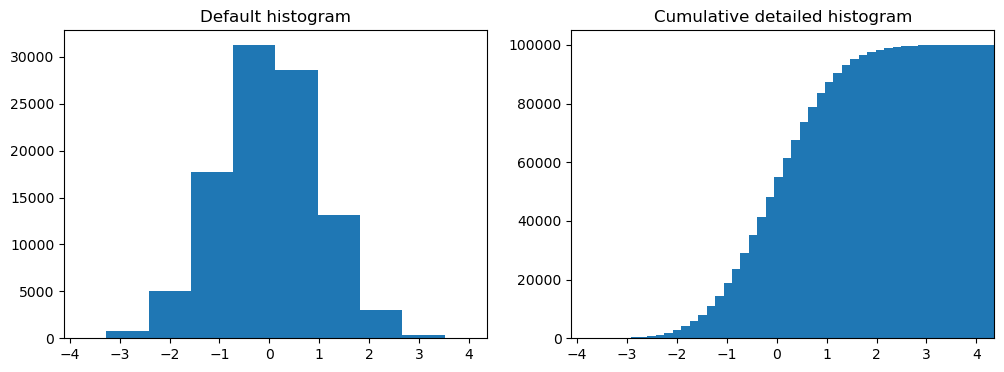

In [7]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)))

- Texto en un plot: Se puede anotar texto en figuras matplotlib usando la función `text`. Admite el formato LaTeX al igual que los textos y títulos de las etiquetas de los ejes.

Adicionalmente se comparte un módulo `text_curv.py` que nos permite añadir el text a lo largo de una curva.

In [8]:
import text_curv as tc  # para añadir texto curveado

Text(0.0, 0.0, ' ')

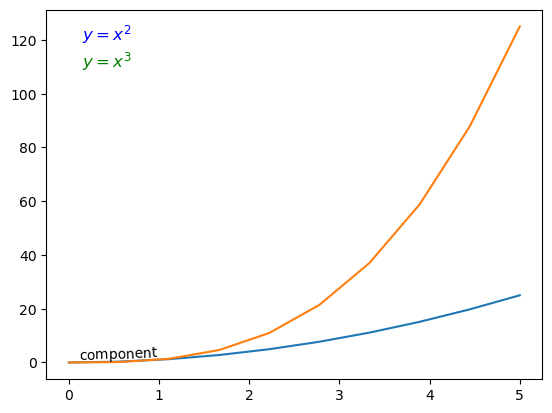

In [11]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 120, r"$y=x^2$", fontsize=12, color="blue")
ax.text(0.15, 110, r"$y=x^3$", fontsize=12, color="green")

text0 = r'component'
tc.CurvedText(
            x = xx,
            y = xx**2,
            text=text0,
            va = 'bottom', # 'bottom' 'center' 'top'
            axes = ax, # grafico al q se añadirá
        )

Como vimos, los ejes se pueden agregar a un frame manualmente usando `fig.add_axes` o usando un administrador de diseño de subplot como `subplots`. Sin embargo existen otros como `subplot2grid` o `gridspec`. A continuación se mostrarán otros ejemplos así como se presentarán otras funciones que permiten administrar el diseño de las subfiguras.

- `subplots`

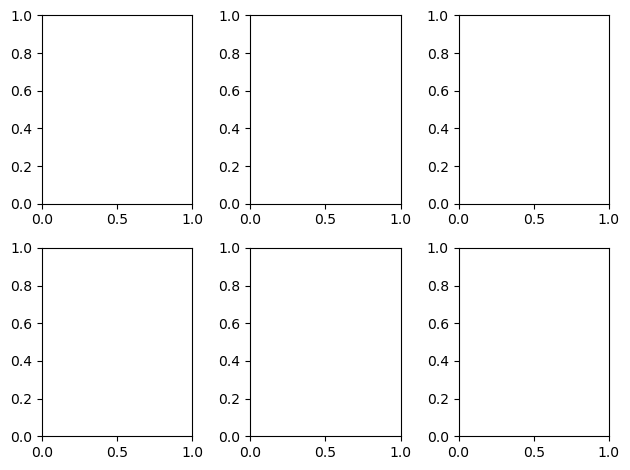

In [12]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

- `subplot2grid`

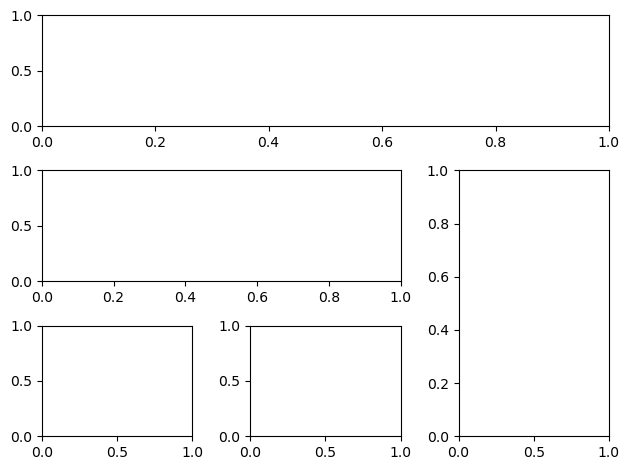

In [14]:
fig = plt.figure()
# shape: Número de filas y de columnas de la grilla en las que colocar el eje.
# loc: Número de fila y número de columna de la ubicación del eje dentro de la cuadrícula.
# colspan: Número de columnas para que el eje se extienda hacia la derecha
# rowspan: Número de filas para que el eje se extienda hacia abajo.
ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

- `gridspec`

In [16]:
import matplotlib.gridspec as gridspec

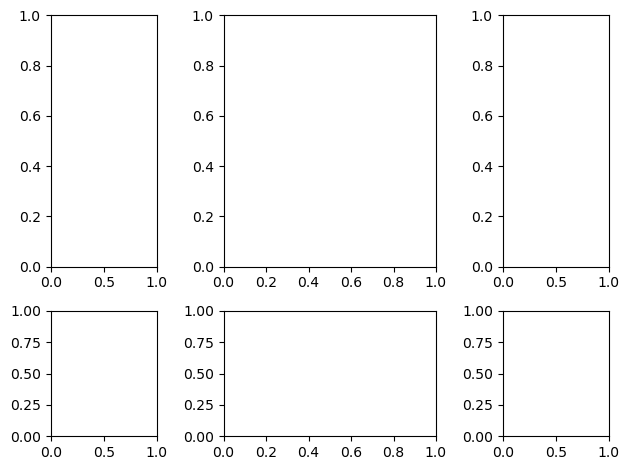

In [17]:
fig = plt.figure()

# height_ratios: Define las alturas relativas de las filas. Cada fila obtiene una altura relativa de height_ratios[i]/sum(height_ratios). 
# Si no se indica, todas las filas tendrán la misma altura.
# width_ratios: Define los anchos relativos de las columnas. Cada columna obtiene un ancho relativo de width_ratios[i] / sum(width_ratios).
# Si no se proporciona, todas las columnas tendrán el mismo ancho.
gs = gridspec.GridSpec(nrows=2, ncols=3, height_ratios=[2, 1], width_ratios=[1, 2, 1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

- Mapa de colores y contornos: En muchas ocasiones que se desean graficar un tercer juego de datos en un plot 2D, para ello se utilizan mapas de colores o contorno para mostrar la información correspondiente al tercer juego de datos. A continuación se muestran unos ejemplos de mapas de colores. 

IMPORTANTE: Es relativamente sencillo definir mapas de colores personalizados. Para obtener una lista de mapas de colores predefinidos, crear o elegir uno consulte: 
- https://matplotlib.org/stable/users/explain/colors/colormap-manipulation.html
- https://matplotlib.org/stable/users/explain/colors/colormaps.html
- https://matplotlib.org/stable/users/explain/colors/colormaps.html

En nuestro caso usaremos los predefinidos.


In [20]:
# creando funcion
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)


# generando malla de datos
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

- `pcolor`

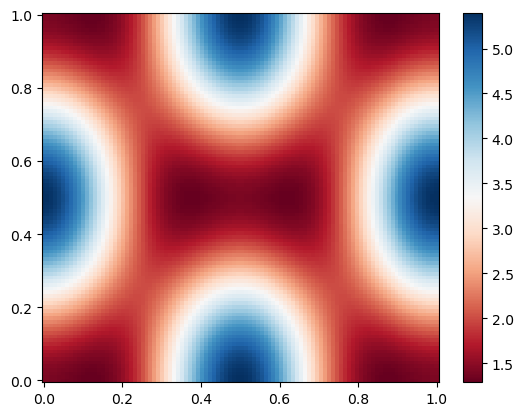

In [23]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

- `imshow`

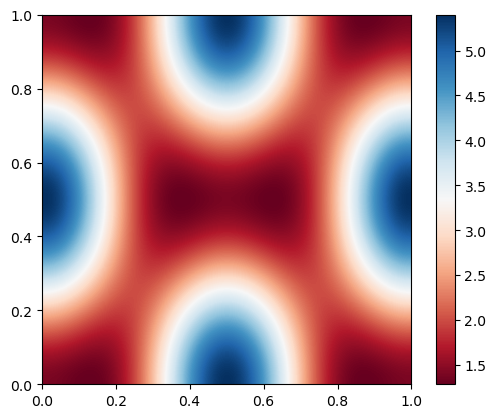

In [24]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

- `contour`

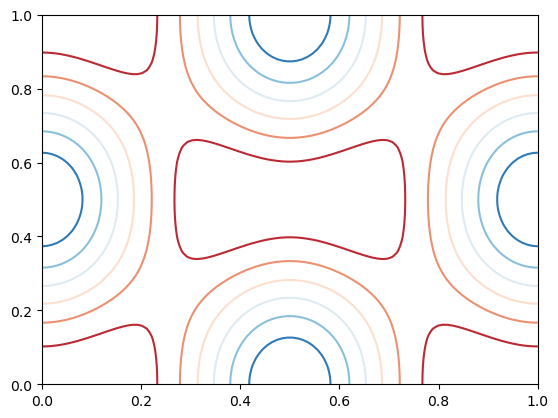

In [25]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## 3D Plots

Similar al caso 2D donde primero creamos un objeto `Figure`, para usar gráficos 3D lo primero que debemos hacer es crear un objeto de la clase `Axes3D`. Los ejes 3D se pueden agregar a un lienzo de figuras matplotlib exactamente de la misma manera que los ejes 2D; o, más convenientemente, pasando un argumento de palabra clave `projection='3d'` a los métodos `add_axes` o `add_subplot`. Veamos algunos tipos de 3D plots:

In [26]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

- [Surface plots](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface.html)

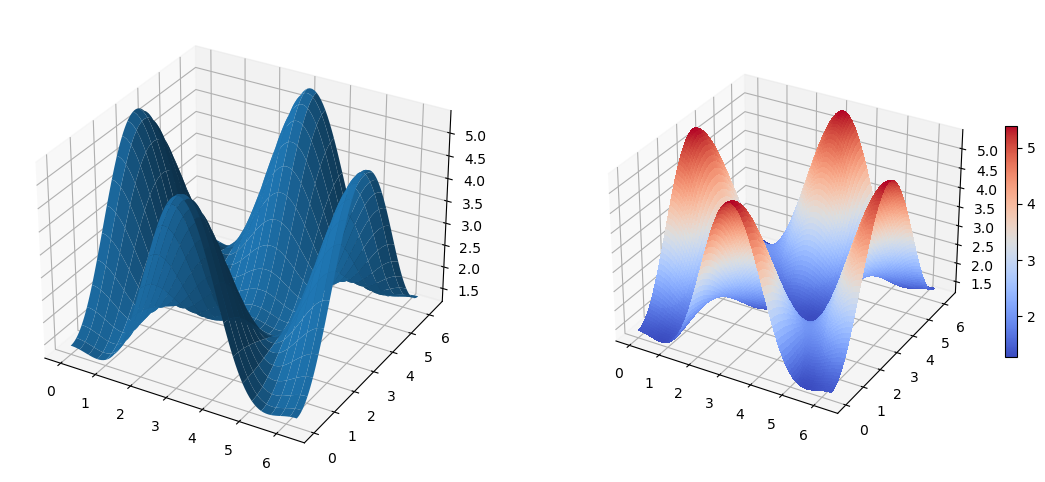

In [30]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)
# rstride, cstride puntos que van a saltarse para el trazado

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

- [Wire-frame plot](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_wireframe.html)

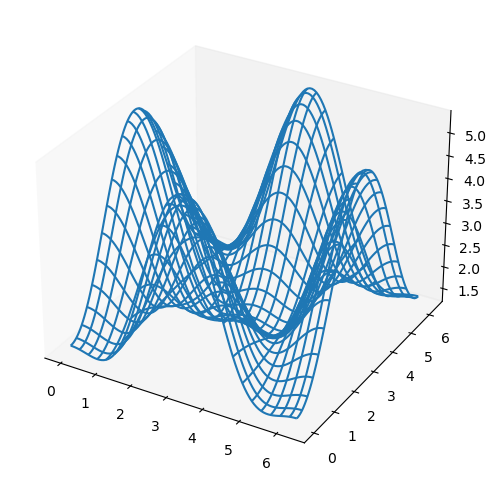

In [35]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
ax.grid(False)



- [Coutour plots with projection](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contour.html)

(-3.141592653589793, 6.283185307179586)

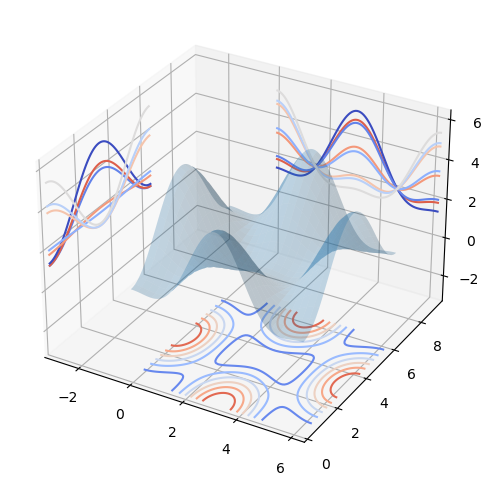

In [37]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi)
ax.set_ylim3d(0, 3*np.pi)
ax.set_zlim3d(-np.pi, 2*np.pi)

- Modificando el ángulo de vision mediante [view_init](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.view_init.html)

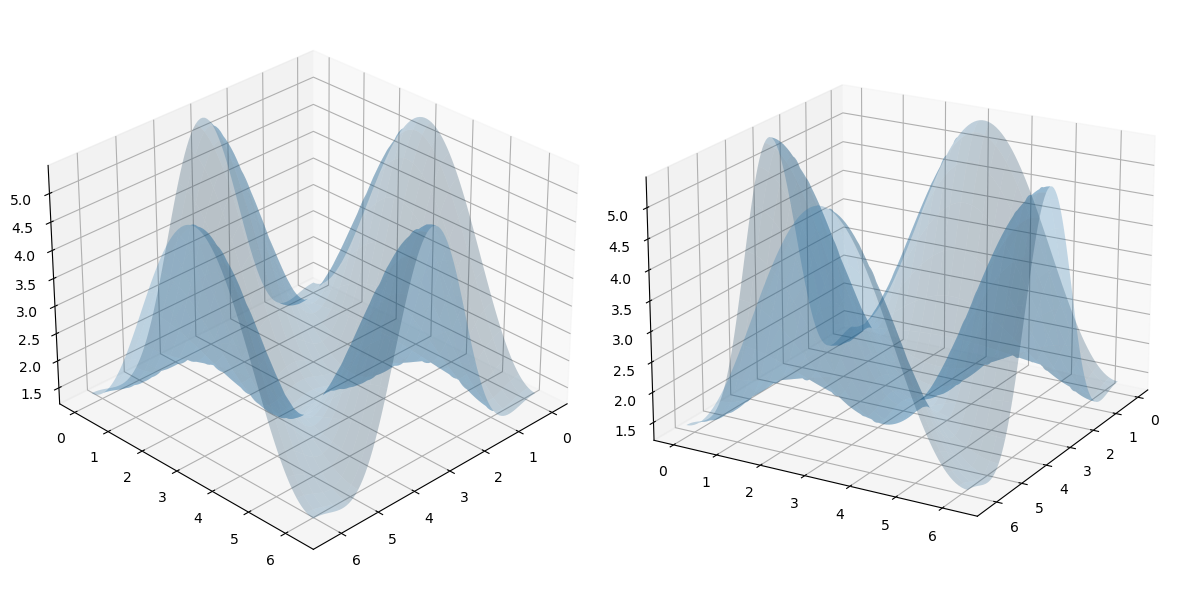

In [40]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(elev=20, azim=30)

fig.tight_layout()

## Animation
Matplotlib also includes a simple API for generating animations for sequences of figures. With the `FuncAnimation` function we can generate a movie file from sequences of figures. The function takes the following arguments: `fig`, a figure canvas, `func`, a function that we provide which updates the figure, `init_func`, a function we provide to setup the figure, `frame`, the number of frames to generate, and `blit`, which tells the animation function to only update parts of the frame which have changed (for smoother animations):

    def init():
        # setup figure

    def update(frame_counter):
        # update figure for new frame

    anim = animation.FuncAnimation(fig, update, init_func=init, frames=200, blit=True)

    anim.save('animation.mp4', fps=30) # fps = frames per second

To use the animation features in matplotlib we first need to import the module `matplotlib.animation`:

Dentro del paquete de `Matplotlib` se incluye una API que nos permite crear animaciones (sencillas) mediante una secuencia de figuras. La encargada de esto es la función `FuncAnimation` la cual genera una película usando las figuras.

La función toma los siguientes argumentos: `fig`, el frame o lienzo de figura, `func`, una función que proporcionamos que actualiza la figura, `init_func`, una función que proporcionamos para configurar la figura, `frame`, el número de cuadros generar, y `blit`, que le indica a la función de animación que solo actualice las partes del cuadro que han cambiado (para animaciones más fluidas). La estructura es la siguiente

In [41]:
# Importemos el módulo de animacón `matplotlib.animation`:
from matplotlib import animation

Consideremos como ejemplo el problema del péndulo doble. Las ecuaciones de movimiento se pueden encontrar en [Wikipedia](https://es.wikipedia.org/wiki/Péndulo_doble)

In [47]:
# Importando los paquetes necesario
from scipy.integrate import solve_ivp # odeint versión vieja
from numpy import cos, sin

def dx(t, x, c):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    g, L, m = c 
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

g = 9.82; L = 0.5; m = 0.1

c = [g, L, m]
x0 = [np.pi/2, np.pi/2, 0, 0]  # initial state [theta1, theta2, dtheta1, dtheta2]
t = np.linspace(0, 10, 250) # time coordinates
#x = odeint(dx, x0, t)    # solve the ODE problem

sol = solve_ivp(dx, [t[0], t[-1]], x0, t_eval=t, args=([c]))    # solve the ODE problem

theta1, theta2 = sol.y[0], sol.y[1]

Genera una animación que muestre las posiciones de los péndulos en función del tiempo:

In [55]:
from IPython.display import HTML

In [60]:
# creando el frame
fig, ax = plt.subplots(figsize=(5,5))
ax.hlines(y=0, xmin=-1, xmax=1, ls='--', color='gray')
ax.set_ylim([-1.5, 0.5])
ax.set_xlim([1, -1])

# creando la imagen inicial
pendulum1, = ax.plot([], [], color="red", lw=2)
pendulum2, = ax.plot([], [], color="blue", lw=2, marker='o')
def init():
    pendulum1.set_data([], [])
    pendulum2.set_data([], [])

def update(n): 
    # n = frame counter
    # calculate the positions of the pendulums
    x1 = + L * sin(theta1[n])
    y1 = - L * cos(theta1[n])
    x2 = x1 + L * sin(theta2[n])
    y2 = y1 - L * cos(theta2[n])
    
    # update the line data
    pendulum1.set_data([0 , x1], [0 , y1])
    pendulum2.set_data([x1, x2], [y1, y2])

anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(t))  # , blit=True

# anim.save se puede llamar de diferentes maneras, algunas de las cuales pueden funcionar o no.
# en diferentes plataformas y con diferentes versiones de matplotlib y codificadores de video
# anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'], writer=animation.FFMpegWriter())
anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
# anim.save('animation.mp4', fps=20, writer="ffmpeg", codec="libx264")
# anim.save('animation.mp4', fps=20, writer="avconv", codec="libx264")

plt.close(fig)

In [61]:
HTML(anim.to_html5_video())

IMPORTANTE: Para generar el archivo de película necesitamos tener instalado `ffmpeg` o `avconv`. 

En Ubuntu usando:

    $ sudo apt-get install ffmpeg

or (newer versions)

    $ sudo apt-get install libav-tools

EN MacOSX, try: 

    $ sudo port install ffmpeg

## [Backends](https://matplotlib.org/stable/users/explain/figure/backends.html#backends)

Matplotlib tiene varios "backends" que son responsables de representar gráficos, es decir se utilizan para mostrar figuras en la pantalla o para escribir en archivos. Los diferentes backends son capaces de generar gráficos con diferentes formatos y bucles de visualización/eventos. Existe una distinción entre backends no interactivos (como `'agg', 'svg', 'pdf'`, etc.) que solo se utilizan para generar archivos de imagen (por ejemplo, con la función `savefig`) y backends interactivos (como `Qt4Agg , GTK, MaxOSX`) que puede mostrar una ventana GUI para explorar figuras de forma interactiva.

Una lista de backends disponibles es:

In [62]:
print(matplotlib.rcsetup.all_backends)

['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


El backend predeterminado, llamado `agg`, se basa en una biblioteca para gráficos rasterizados que es excelente para generar formatos rasterizados como PNG. **RECORDAR**: un gráfico rasterizado o también llamdo mapa de bits o bitmap, representan la imagen mediante un conjunto de valores dispuestos en filas y columnas.

Normalmente no necesitamos molestarnos en cambiar el backend predeterminado; pero a veces puede resultar útil cambiar a, por ejemplo, PDF o GTKCairo (si utiliza Linux) para producir gráficos vectoriales de alta calidad en lugar de gráficos rasterizados

In [1]:
# REINICIA EL NOTEBOOK: el backend de Matplotlib solo se puede seleccionar antes de importar pylab
# (Kernel -> Restart) 
import matplotlib
matplotlib.use('svg')

import matplotlib.pylab as plt
import numpy

from IPython.display import Image, SVG

In [2]:
# Ahora estamos usando el backend de svg para producir gráficos vectoriales SVG.
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))
plt.savefig("test.svg")

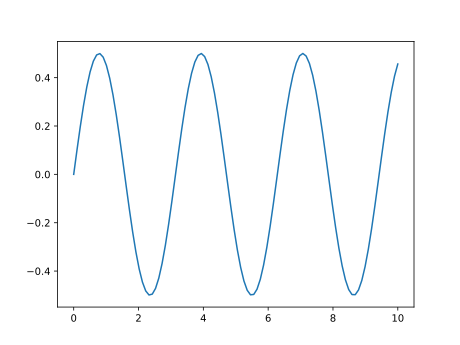

In [3]:
# Show the produced SVG file. 
SVG(filename="test.svg")

Otro ejemplo para crear un plot interactivo (esto tiene más sentido en un archivo de script de Python)

In [2]:
# REINICIA EL NOTEBOOK: el backend de Matplotlib solo se puede seleccionar antes de importar pylab
# (Kernel -> Restart) 
import matplotlib
matplotlib.use('MacOSX') # or for example Qt4Agg para otros lenguajes

import matplotlib.pylab as plt
import numpy as np

In [3]:
# Now, open an interactive plot window with the MacOSX backend
fig, ax = plt.subplots()
t = np.linspace(0, 10, 100)
ax.plot(t, np.cos(t) * np.sin(t))
plt.show()

: 

!!Listo!! Ahora comencémos con Métodos Numéricos